<a href="https://colab.research.google.com/github/Coolicc/Big-Data-Analysis-PySpark/blob/main/Ognjen_Kuli%C4%87_5_%C4%8Das_zadaci_za_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Podešavanje Sparka za rad u Google Colabu
#####Izvršite sve komande u datom redosledu

In [ ]:
!java -version

openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [ ]:
!update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
!pip install pyspark

####Dokumentacija za funkcije u PySpark-u https://spark.apache.org/docs/latest/api/python/index.html

###Zadatak
Za ovaj zadatak trebaće vam skup podataka koji možete da skinete sa https://www.kaggle.com/bls/american-time-use-survey
Ovo je detaljna statistika kako Amerikanci koriste svoje vreme i na ovoj adresi je dato više fajlova, ali nama treba samo fajl **atussum.scv**. 

Naš zadatak je da odgovorimo na sledeća pitanja:


1.   Koliko vremena se troši na primarne aktivnosti u odnosu na ostale aktivnosti?
2.   Da li muškarci i žene troše isto vremena na posao?
3.   Da li se vreme potrošeno na primarne aktivnosti menja kako ljudi postaju stariji?
4.   Koliko vremena zaposleni ljudi troše na slobodne aktivnosti u odnosu na nezaposlene?

Fajl atussum.csv ima 455 kolona gde je detaljno za svaku aktivnost uneto koliko minuta se dnevno troši na nju. Aktivnosti su označene sa šiframa npr t010101 i postoji šifarnik šta koja šifra predstavlja (može se naći u opisu podatka na kaggle sajtu).
Mi ćemo aktivnosti grupisati na primarne, posao i slobodne aktivnosti.


*   **primarne** - obuhvataju kolone čiji nazivi počinju sa t01, t03, t11, t1801, t1803
*   **posao** - obuhvataju kolone čiji nazivi počinju sa t05, t1805
*   **slobodne** - obuhvataju kolone čiji nazivi počinju sa t02,t04,t06,t07,t08,t09,t10,t12,t13,t14,t15,t16,t18 (bez kolona koja su ranije navedene)

Takođe u fajlu za svakog upitanika je dat tačan broj godina a nas zanimaju samo starosne grupe. Pri čemu su:
*   **mladi** - oni koji imaju manje od 22
*   **aktivni** - oni između 22-55
*   **stariji** - oni preko 55

Konačan rezultat treba da bude u formi tabele i vremena su izražena u satima

 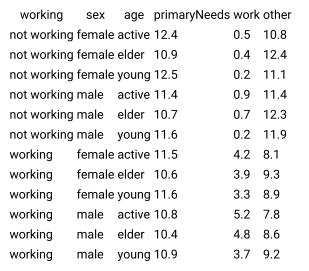


 Rezultate vizualizujete. Postoji funkcija toPandas() koja Spark DataFrame pretvara u Pandas DataFrame i onda nad tim objektom koristite Python biblioteke za vizualizaciju









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
data = spark.read.option("header","true").csv("/content/drive/My Drive/atussum.csv")

In [ ]:
data.show(5)

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------

In [ ]:
data2 = data.withColumnRenamed("tucaseid", "id")
data2.show(5)

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------

In [ ]:
import pyspark.sql.functions as func
data3 = data2.withColumn("sex", func.when(func.col("tesex") == '1', 'male').otherwise('female'))
data3.show(5)

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------

In [ ]:
from pyspark.sql.types import *
data4 = data3.withColumn('teage', func.col('teage').cast(IntegerType()))
data5 = data4.withColumn('age', func.when(func.col('teage') < 22, 'young').when(func.col('teage') > 55, 'elder').otherwise('active'))
data5.show(5)

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------

In [ ]:
data6 = data5.withColumn('employed', func.when((func.col('telfs') == '1') | (func.col('telfs') == '2'), 'employed').otherwise('unemployed'))
data6.show(5)

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------


    primarne - obuhvataju kolone čiji nazivi počinju sa t01, t03, t11, t1801, t1803
    posao - obuhvataju kolone čiji nazivi počinju sa t05, t1805
    slobodne - obuhvataju kolone čiji nazivi počinju sa t02,t04,t06,t07,t08,t09,t10,t12,t13,t14,t15,t16,t18 (bez kolona koja su ranije navedene)


In [ ]:
primaryNeedsCols = []
workCols = []
otherCols = []
for col in data6.columns:
  if col.startswith('t01') | col.startswith('t03') | col.startswith('t11') | col.startswith('t1801') | col.startswith('t1803'):
    primaryNeedsCols.append(col)
  elif col.startswith('t05') | col.startswith('t1805'):
    workCols.append(col)
  elif col.startswith('t0') | col.startswith('t1'):
    otherCols.append(col)
allTimeCols = primaryNeedsCols + workCols + otherCols
for col in allTimeCols:
  data6 = data6.withColumn(col, func.col(col).cast(IntegerType()))

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------

In [ ]:
data7 = data6.withColumn('primary_needs', sum(data6[col] for col in primaryNeedsCols)/60).withColumn('work', sum(data6[col] for col in workCols)/60).withColumn('other', sum(data6[col] for col in otherCols)/60)
data8 = data7.withColumn('primary_needs', func.round(func.col('primary_needs'),1)).withColumn('work', func.round(func.col('work'),1)).withColumn('other', func.round(func.col('other'),1))
data8.show(5)

+--------------+--------+--------+-------+--------+--------+-----+-----+------+--------+--------+-----+----------+----------+--------+-------+---------+--------+--------+----------+----------+--------+--------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------

In [ ]:
tfdata = data8.select(['id','employed','sex','age','primary_needs','work','other'])
tfdata.show(5)

+--------------+----------+------+------+-------------+----+-----+
|            id|  employed|   sex|   age|primary_needs|work|other|
+--------------+----------+------+------+-------------+----+-----+
|20030100013280|  employed|  male| elder|         15.3| 0.0|  8.8|
|20030100013344|  employed|female|active|         13.8| 0.0| 10.2|
|20030100013352|  employed|female|active|         11.9| 0.0| 12.1|
|20030100013848|unemployed|female|active|         13.1| 2.0|  8.9|
|20030100014165|  employed|  male|active|         11.8| 8.6|  3.6|
+--------------+----------+------+------+-------------+----+-----+
only showing top 5 rows



In [ ]:
avgtime = tfdata.agg(func.round(func.avg(tfdata.primary_needs),1),func.round(func.avg(tfdata.work),1),func.round(func.avg(tfdata.other),1))
avgtimePD = avgtime.toPandas()
avgtimePD.columns = ['primary_needs','work','other']
avgtimePD

,primary_needs,work,other
0,11.4,2.9,9.6


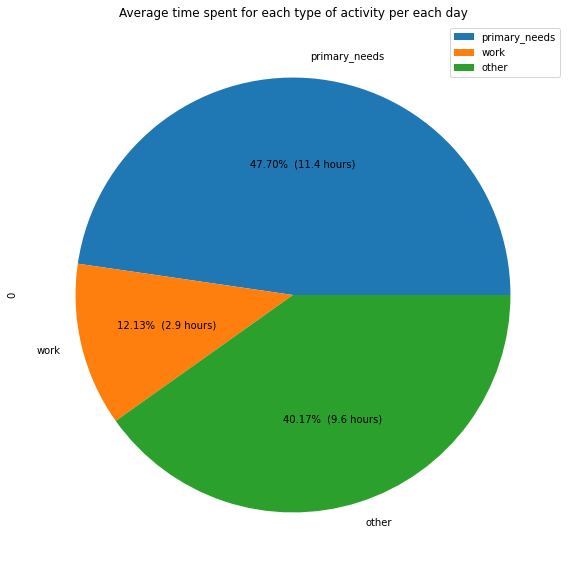

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

avgtimePD.T.plot.pie(y=0,figsize=(10,10),title='Average time spent for each type of activity per each day',autopct=lambda p : '{:.2f}%  ({:,.1f} hours)'.format(p,p * 24/100))

In [ ]:
avgWorkBySexPD = tfdata.groupBy('sex').avg('work').withColumn('avg(work)', func.round(func.col('avg(work)'),1)).toPandas()

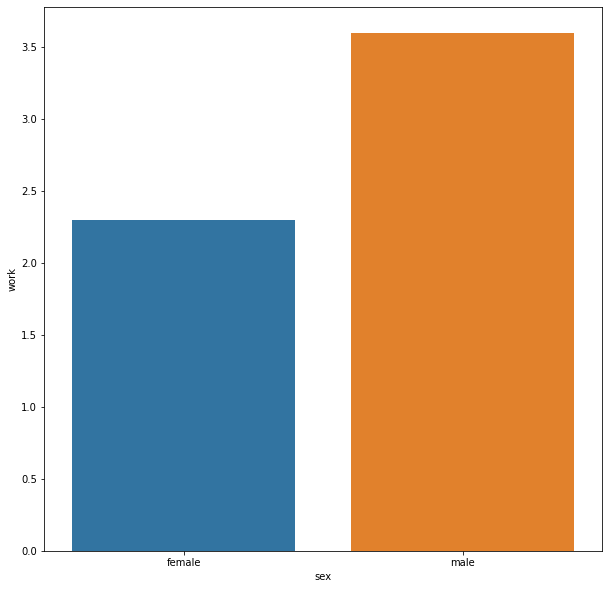

In [ ]:
avgWorkBySexPD.columns = ['sex', 'work']
plt.figure(figsize=(10, 10))
sn.barplot(x='sex', y='work', data=avgWorkBySexPD)

In [ ]:
avgPrimByAgePD = tfdata.groupBy('age').avg('primary_needs').withColumn('avg(primary_needs)', func.round(func.col('avg(primary_needs)'),1)).toPandas()

  age_group  primary_needs
0    active           11.5
1     young           11.7
2     elder           11.0


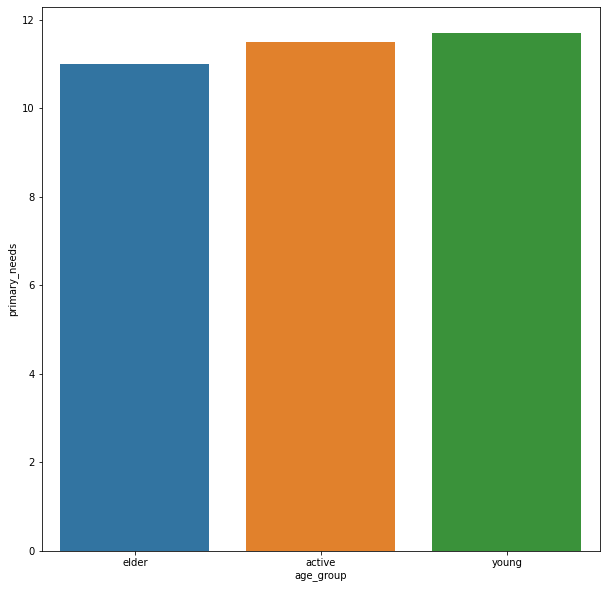

In [ ]:
avgPrimByAgePD.columns = ['age_group','primary_needs']
print(avgPrimByAgePD)
plt.figure(figsize=(10, 10))
sn.barplot(x='age_group', y='primary_needs', data=avgPrimByAgePD.sort_values(by=['primary_needs']))

In [ ]:
avgOtherByEmpPD = tfdata.groupBy('employed').avg('other').withColumn('avg(other)', func.round(func.col('avg(other)'),1)).toPandas()

  employed_status  other_activities
0      unemployed              11.8
1        employed               8.2


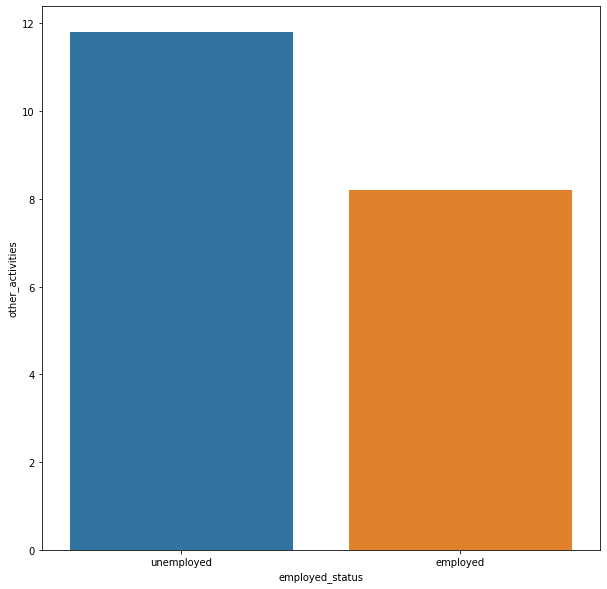

In [ ]:
avgOtherByEmpPD.columns = ['employed_status', 'other_activities']
print(avgOtherByEmpPD)
plt.figure(figsize=(10, 10))
sn.barplot(x='employed_status', y='other_activities', data=avgOtherByEmpPD)